# PlutoData 
[1.Import Data](Import_Data)


[2.Locate Study Area](Locate_StudyArea)


[3.Final Data](Final_Dataset)


[4.Dictionary](Dictionary)

## Import_Data

In [102]:
import pandas as pd
import urllib
import requests
import geopandas as gpd
import pylab as pl
import shapely
from fiona.crs import from_epsg
from IPython.display import Image
pd.set_option('display.max_columns', 500)

In [7]:
url = "https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nyc_mappluto_18v2_1_shp.zip"
urllib.request.urlretrieve(url, "file.gz")
!unzip file.gz

Archive:  file.gz
  inflating: MapPLUTO.cpg            
  inflating: MapPLUTO.dbf            
  inflating: MapPLUTO.prj            
  inflating: MapPLUTO.sbn            
  inflating: MapPLUTO.sbx            
  inflating: MapPLUTO.shp            
  inflating: MapPLUTO.shp.xml        
  inflating: MapPLUTO.shx            
  inflating: PLUTODD18v2.1.pdf       
  inflating: PlutoReadme18v2.1.pdf   


In [9]:
plutoshp = gpd.GeoDataFrame.from_file("MapPLUTO.shp")

In [10]:
plutoshp.head()

,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLA,PFIRM15_FL,Version,Shape_Leng,Shape_Area,geometry
0,MN,1,10,101,5,1022,02,1,10004,E007,...,None,0.000000e+00,None,1,1,1,18v2.1,12277.824113,7.550340e+06,"POLYGON ((979561.8712409735 191884.2491553128,..."
1,MN,1,101,101,1,1001,02,1,10004,E007,...,None,0.000000e+00,None,1,None,1,18v2.1,3940.840373,5.018974e+05,(POLYGON ((972382.8255597204 190647.2667211443...
2,MN,1,201,101,1,1000,02,1,10004,E007,...,None,0.000000e+00,None,1,None,1,18v2.1,6306.268341,1.148539e+06,"POLYGON ((973154.7118112147 194614.3312935531,..."
3,MN,2,1,101,9,1025,02,1,10004,L015,...,None,1.000020e+09,08/07/2012,1,1,1,18v2.1,2721.060649,1.008250e+05,"POLYGON ((980915.0020648837 194319.1402828991,..."
4,MN,2,2,101,9,1025,02,1,10004,L015,...,None,1.000020e+09,08/07/2012,1,1,1,18v2.1,2411.869687,8.724423e+04,"POLYGON ((981169.004181549 194678.8213220537, ..."


In [15]:
plutoshp.shape

(857374, 90)

In [11]:
plutoshp.columns

Index(['Borough', 'Block', 'Lot', 'CD', 'CT2010', 'CB2010', 'SchoolDist',
       'Council', 'ZipCode', 'FireComp', 'PolicePrct', 'HealthCent',
       'HealthArea', 'Sanitboro', 'SanitDistr', 'SanitSub', 'Address',
       'ZoneDist1', 'ZoneDist2', 'ZoneDist3', 'ZoneDist4', 'Overlay1',
       'Overlay2', 'SPDist1', 'SPDist2', 'SPDist3', 'LtdHeight', 'SplitZone',
       'BldgClass', 'LandUse', 'Easements', 'OwnerType', 'OwnerName',
       'LotArea', 'BldgArea', 'ComArea', 'ResArea', 'OfficeArea', 'RetailArea',
       'GarageArea', 'StrgeArea', 'FactryArea', 'OtherArea', 'AreaSource',
       'NumBldgs', 'NumFloors', 'UnitsRes', 'UnitsTotal', 'LotFront',
       'LotDepth', 'BldgFront', 'BldgDepth', 'Ext', 'ProxCode', 'IrrLotCode',
       'LotType', 'BsmtCode', 'AssessLand', 'AssessTot', 'ExemptLand',
       'ExemptTot', 'YearBuilt', 'YearAlter1', 'YearAlter2', 'HistDist',
       'Landmark', 'BuiltFAR', 'ResidFAR', 'CommFAR', 'FacilFAR', 'BoroCode',
       'BBL', 'CondoNo', 'Tract2010', 'XCo

In [14]:
plutoshp.Borough.unique()

array(['MN', 'BX', 'BK', 'QN', 'SI'], dtype=object)

## Locate_StudyArea

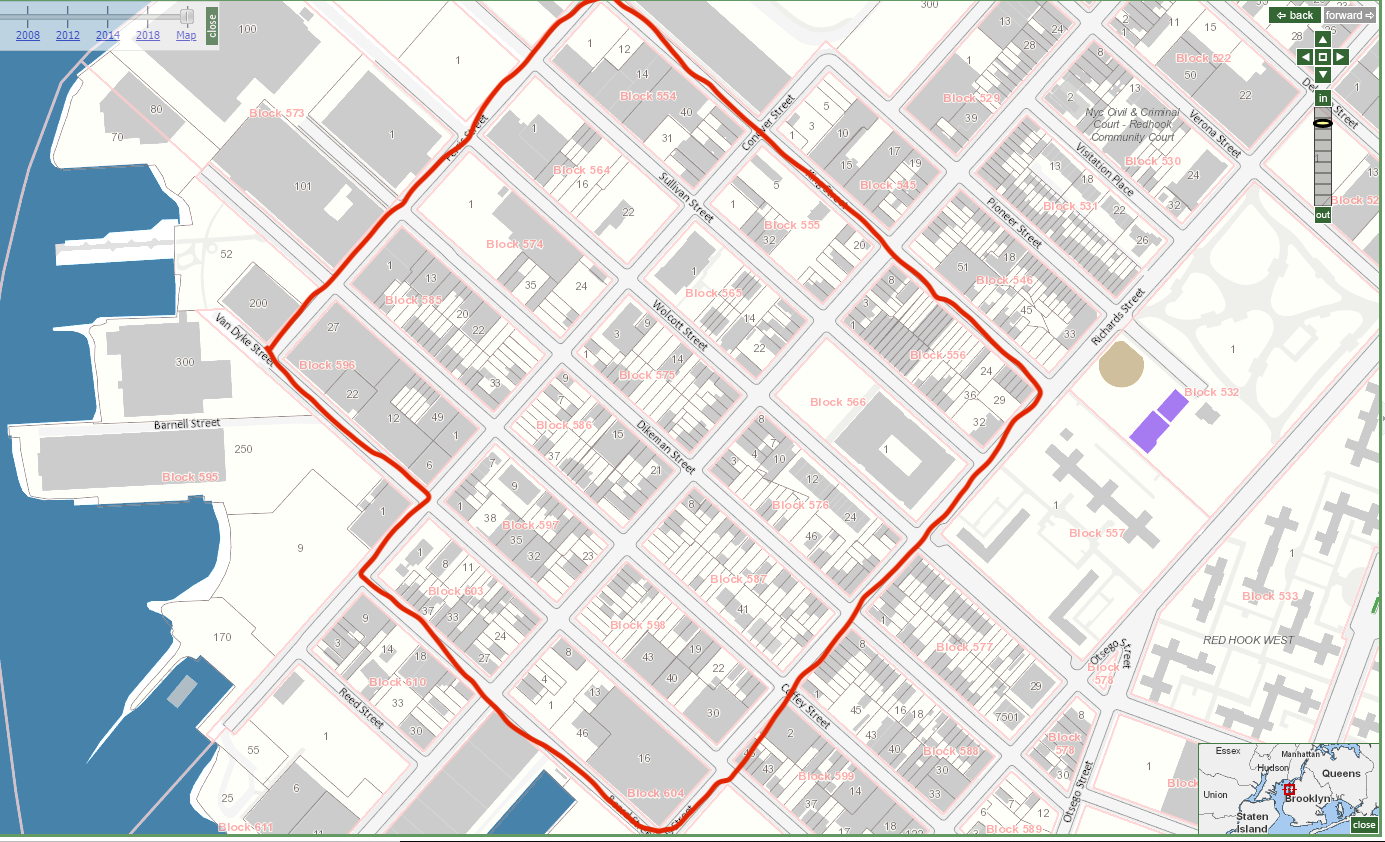

In [104]:
Image('Study_Area.png')

**This is our designated study area.**

In [16]:
bk_plutoshp = plutoshp[plutoshp.Borough=='BK']

In [17]:
bk_plutoshp.shape

(276532, 90)

In [21]:
redhook_plutoshp = bk_plutoshp[bk_plutoshp["ZipCode"] == 11231]

In [23]:
redhook_plutoshp.shape

(4750, 90)

In [31]:
studyarea_block = [554, 555, 556, 564, 565, 566, 574, 575, 576, 585, 586, 587, 596, 597, 598, 603, 604]

In [35]:
studyarea_shp = redhook_plutoshp[(redhook_plutoshp["Block"] == 554) | (redhook_plutoshp["Block"] == 555)
                |(redhook_plutoshp["Block"] == 556) |(redhook_plutoshp["Block"] == 564)
                |(redhook_plutoshp["Block"] == 565) |(redhook_plutoshp["Block"] == 566)
                |(redhook_plutoshp["Block"] == 574) |(redhook_plutoshp["Block"] == 575)
                |(redhook_plutoshp["Block"] == 576) |(redhook_plutoshp["Block"] == 585)
                |(redhook_plutoshp["Block"] == 586) |(redhook_plutoshp["Block"] == 587)
                |(redhook_plutoshp["Block"] == 596) |(redhook_plutoshp["Block"] == 597)
                |(redhook_plutoshp["Block"] == 598) | (redhook_plutoshp["Block"] == 603)
                |(redhook_plutoshp["Block"] == 604)]

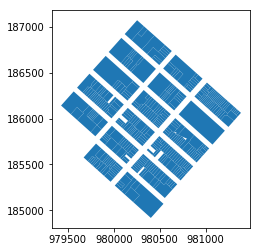

In [37]:
studyarea_shp.plot()

In [38]:
studyarea_shp.shape

(370, 90)

In [44]:
studyarea_shp["BBL"].nunique()

370

In [49]:
studyarea_shp["BBL"] = studyarea_shp["BBL"].astype(int)

/anaconda3/envs/myEnv3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [42]:
# studyarea_shp.to_file('redhook.shp')

In [52]:
studyarea_shp["ZoneDist1"].isna().sum()

0

In [53]:
studyarea_shp["ZoneDist2"].isna().sum()

367

In [54]:
studyarea_shp["ZoneDist3"].isna().sum()

370

In [57]:
studyarea_shp["ZoneDist4"].isna().sum()

370

In [67]:
pd.set_option('display.max_rows', 500)

In [68]:
studyarea_shp.isna().sum()

Borough         0
Block           0
Lot             0
CD              0
CT2010          0
CB2010          0
SchoolDist      0
Council         0
ZipCode         0
FireComp        0
PolicePrct      0
HealthCent      0
HealthArea      0
Sanitboro       0
SanitDistr      0
SanitSub        0
Address         0
ZoneDist1       0
ZoneDist2     367
ZoneDist3     370
ZoneDist4     370
Overlay1      279
Overlay2      370
SPDist1       333
SPDist2       370
SPDist3       370
LtdHeight     370
SplitZone       0
BldgClass       0
LandUse        15
Easements       0
OwnerType     361
OwnerName      11
LotArea         0
BldgArea        0
ComArea         0
ResArea         0
OfficeArea      0
RetailArea      0
GarageArea      0
StrgeArea       0
FactryArea      0
OtherArea       0
AreaSource      0
NumBldgs        0
NumFloors       0
UnitsRes        0
UnitsTotal      0
LotFront        0
LotDepth        0
BldgFront       0
BldgDepth       0
Ext           350
ProxCode        0
IrrLotCode      0
LotType   

### Drop the columns which full of N/A

In [69]:
studyarea_shp.drop(columns = {"ZoneDist3","ZoneDist4","Overlay2","SPDist2","SPDist3","LtdHeight","HistDist","ZMCode"},
                  axis=1, inplace=True)

/anaconda3/envs/myEnv3/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [70]:
studyarea_shp.shape

(370, 82)

In [71]:
studyarea_shp.columns.values

array(['Borough', 'Block', 'Lot', 'CD', 'CT2010', 'CB2010', 'SchoolDist',
       'Council', 'ZipCode', 'FireComp', 'PolicePrct', 'HealthCent',
       'HealthArea', 'Sanitboro', 'SanitDistr', 'SanitSub', 'Address',
       'ZoneDist1', 'ZoneDist2', 'Overlay1', 'SPDist1', 'SplitZone',
       'BldgClass', 'LandUse', 'Easements', 'OwnerType', 'OwnerName',
       'LotArea', 'BldgArea', 'ComArea', 'ResArea', 'OfficeArea',
       'RetailArea', 'GarageArea', 'StrgeArea', 'FactryArea', 'OtherArea',
       'AreaSource', 'NumBldgs', 'NumFloors', 'UnitsRes', 'UnitsTotal',
       'LotFront', 'LotDepth', 'BldgFront', 'BldgDepth', 'Ext',
       'ProxCode', 'IrrLotCode', 'LotType', 'BsmtCode', 'AssessLand',
       'AssessTot', 'ExemptLand', 'ExemptTot', 'YearBuilt', 'YearAlter1',
       'YearAlter2', 'Landmark', 'BuiltFAR', 'ResidFAR', 'CommFAR',
       'FacilFAR', 'BoroCode', 'BBL', 'CondoNo', 'Tract2010', 'XCoord',
       'YCoord', 'ZoneMap', 'Sanborn', 'TaxMap', 'EDesigNum', 'APPBBL',
       'APPDat

### Choose the features we interested in, store it in different dataframe

## Final_Dataset

In [98]:
studyarea = studyarea_shp[["BBL","Block","Lot","ZoneDist1","LandUse","BldgArea","ComArea","ResArea","OfficeArea","RetailArea","GarageArea",
                          "StrgeArea","FactryArea","OtherArea","NumBldgs","NumFloors","UnitsRes","UnitsTotal",
                          "BldgDepth","BuiltFAR","ResidFAR","CommFAR","FacilFAR"]]

In [99]:
studyarea = studyarea.reset_index()

In [100]:
studyarea.drop(columns = {"index"},axis=1, inplace=True)

In [101]:
studyarea.head()

,BBL,Block,Lot,ZoneDist1,LandUse,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,NumBldgs,NumFloors,UnitsRes,UnitsTotal,BldgDepth,BuiltFAR,ResidFAR,CommFAR,FacilFAR
0,3005540001,554,1,M2-1,10,5820,5820,0,0,0,5820,0,0,0,1,1.0,0,1,96.83,0.29,0.0,2.0,0.0
1,3005540012,554,12,M2-1,10,0,0,0,0,0,0,0,0,0,2,0.0,0,0,0.00,0.00,0.0,2.0,0.0
2,3005540014,554,14,M2-1,10,24575,24575,0,0,0,24575,0,0,0,4,1.0,0,1,200.00,0.98,0.0,2.0,0.0
3,3005540027,554,27,M2-1,06,2500,2500,0,0,0,0,2500,0,0,1,1.0,0,1,100.00,1.00,0.0,2.0,0.0
4,3005540028,554,28,M2-1,02,5872,0,5872,0,0,0,0,0,0,1,4.0,8,8,60.00,2.35,0.0,2.0,0.0


## Dictionary

### ZoneDist1
- The zoning district classification of the tax lot.
- Under the Zoning Resolution, the map of New York City is generally apportioned into three basic zoning district categories: Residence (R), Commercial (C) and Manufacturing (M), which are further divided into a range of individual zoning districts, denoted by different number and letter combinations. In general, the higher the number immediately following the first letter (R, C or M), the higher the density or intensity of land use permitted.
- If the tax lot is divided by a zoning boundary line, ZONING DISTRICT 1 represents the zoning district classification occupying the greatest percentage of the tax lot’s area. Only zoning districts that cover at least 10% of a tax lot’s area are included.
- R1-1 - R10H: Residential Districts
- C1-6 - C8-4: Commercial Districts
- M1-1 – M3-2: Manufacturing Districts
- M1-1/R5 – M1-6/R10: Mixed Manufacturing & Residential Districts
- BPC: Battery Park City
- PARK: Areas designated as PARK, BALL FIELD, PLAYGROUND and PUBLIC SPACE in NYC Zoning Districts

### Land Use
- 01: One & Two Family Buildings
- 02: Multi-Family Walk-Up Buildings
- 03: Multi-Family Elevator Buildings
- 04: Mixed Residential & Commercial Buildings
- 05: Commercial & Office Buildings
- 06: Industrial & Manufacturing
- 07: Transportation & Utility
- 08: Public Facilities & Institutions
- 09: Open Space & Outdoor Recreation
- 10: Parking Facilities
- 11: Vacant Land

**Should I drop 'None' in Land Use?**

### BldgArea
- Total building floor area: The total gross area in square feet, except for condominium measurements which come from the Condo Declaration and are net square footage not gross.
- A TOTAL BUILDING FLOOR AREA of zero can mean it is either not available or not applicable. If NUMBER OF BUILDINGS is greater than zero, then a TOTAL BUILDING FLOOR AREA of zero means it is not available. If NUMBER OF BUILDINGS is zero, then a TOTAL BUILDING FLOOR AREA of zero means it is not applicable.

### CommArea
- Commercial floor area: An estimate of the exterior dimensions of the portion of the structure(s) allocated for commercial use.
- A COMMERCIAL FLOOR AREA of zero can mean it is either not available or not applicable.
- The sum of the various floor area fields does not always equal TOTAL BUILDING FLOOR AREA

### ResArea
- Residential floor area: An estimate of the exterior dimensions of the portion of the structure(s) allocated for residential use.
- A RESIDENTIAL FLOOR AREA of zero can mean it is either not available or not applicable.
- The sum of the various floor area fields does not always equal TOTAL BUILDING FLOOR AREA.

### OfficeArea
- Office floor area: An estimate of the exterior dimensions of the portion of the structure(s) allocated for office use.
- This information is NOT available for one, two or three family structures.
- An OFFICE FLOOR AREA of zero can mean it is either not available or not applicable.
- The sum of the various floor area fields does not always equal TOTAL BUILDING FLOOR AREA.

### RetailArea
- Retail floor area: An estimate of the exterior dimensions of the portion of the structure(s) allocated for retail use.
- A RETAIL FLOOR AREA of zero can mean it is either not available or not applicable.
- The sum of the various floor area fields does not always equal TOTAL BUILDING FLOOR AREA.

### GarageArea
- Garage floor area: An estimate of the exterior dimensions of the portion of the structure(s) allocated for garage use.
- A GARAGE FLOOR AREA of zero can mean it is either not available or not applicable.
- The sum of the various floor area fields does not always equal TOTAL BUILDING FLOOR AREA.

### StrgeArea
- Storage floor area: An estimate of the exterior dimensions of the portion of the structure(s) allocated for storage or loft purposes.
- A STORAGE FLOOR AREA of zero can mean it is either not available or not applicable.
- The sum of the various floor area fields does not always equal TOTAL BUILDING FLOOR AREA.

### FactryArea
- Factory floor area: An estimate of the exterior dimensions of the portion of the structure(s) allocated for factory, warehouse or loft use.
- A FACTORY FLOOR AREA of zero can mean it is either not available or not applicable.
- The sum of the various floor area fields does not always equal TOTAL BUILDING FLOOR AREA.

### OtherArea
- Other floor area: An estimate of the exterior dimensions of the portion of the structure(s) allocated for other than commercial, residential, office, retail, garage, storage, or factory use.
- An OTHER FLOOR AREA of zero can mean it is either not available or not applicable.
- The sum of the various floor area fields does not always equal TOTAL BUILDING FLOOR AREA.

### NumBldgs
- Number of buildings: The number of buildings on the tax lot.

### NumFloors
- Number of floors: The number of full and partial stories starting from the ground floor, for the tallest building on the tax lot.
- Above ground basements are not included in the NUMBER OF FLOORS.
- A roof used for parking, farming, playground, etc. is not included in NUMBER OF FLOORS.
- If the NUMBER OF FLOORS is zero and the NUMBER OF BUILDINGS is greater than zero, then NUMBER OF FLOORS is not available for the tax lot.
- If the NUMBER OF FLOORS is zero and the NUMBER OF BUILDINGS is zero, then NUMBER OF FLOORS is not applicable for the tax lot.

### UnitsRes
- The sum of residential units in all buildings on the tax lot.
- If there are no residential units in the tax lot, this field will be zero.
- Hotels/motels, nursing homes and SROs do not have residential units, but boarding houses do. Basement units for building superintendents are counted as a residential unit.

### UnitsTotal
- Total units: The sum of residential and non-residential (offices, retail stores, etc.) units for all buildings on the tax lot.
- The count of non-residential units is sometimes not available if the building contains residential units.

### BldgDepth
- Building depth: The building’s depth, which is the effective perpendicular distance, measured in feet.


### BuiltFAR
- Built floor area ratios: The BUILT FLOOR AREA RATIO is the total building floor area divided by the area of the tax lot.

### ResidFAR
- Maximum allowable residential FAR

### CommFAR
- Maximum allowable commercial FAR

### FacilFAR
- Maximum allowable community facility FAR